In [40]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand
import scipy.special
import math
import pandas as pd
from tqdm import tqdm
from scipy.stats.distributions import chi2
from scipy import stats

## Задание 1

### 1.1 Генератор схемы Бернулли. Датчик Биноминального распределения.

In [2]:
def bernoulli(p, *shape):
    if p<0 or p>1:
        raise ValueError('p = {:.2f} is out of bounds [0, 1]'.format(p))
    
    #если размер вектора задан в виде списка
    if len(shape) == 1:
        return 1*(rand.uniform(0, 1, shape[0]) < p)
    else:
        return 1*(rand.uniform(0, 1, shape) < p)

bernoulli(0.2, [2, 5, 10])

array([[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 1, 1],
        [0, 0, 0, 0, 1, 1, 0, 1, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]])

In [3]:
def binomial(p, n, *shape):
    if p<0 or p>1:
        raise ValueError('p = {:.2f} is out of bounds [0, 1]'.format(p))
    if n <= 0 or type(n) is not int:
        raise ValueError('n = {:.2f} is incorrect'.format(n))
    
    if len(shape) == 0:
        bernoulli_vector = bernoulli(p, n)
    else:
        if len(shape) == 1:
            #если размер вектора задан в виде списка
            if type(shape[0]) is list:
                bernoulli_vector = bernoulli(p, [n] + shape[0])
            else:
                bernoulli_vector = bernoulli(p, n, shape[0])
        else:
            bernoulli_vector = bernoulli(p, [n] + list(shape))
    return np.sum(bernoulli_vector, axis=0)

binomial(0.5, 5, 4)

array([0, 3, 2, 2])

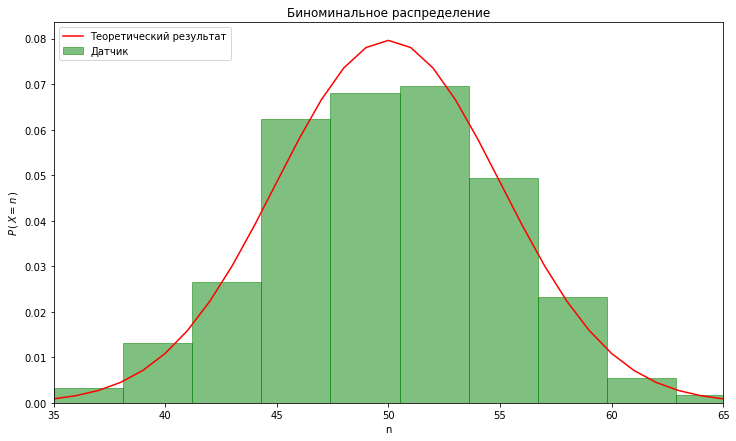

In [4]:
plt.figure(figsize=(12, 7))
p = 0.5
n = 100
N = 1000
my_generator = binomial(p, n, N)
plt.hist(my_generator, density=True, alpha = 0.5, edgecolor='g', color='g')
test_generator = []
for i in range(n):
    test_generator += [scipy.special.binom(n, i) * (p**i) * ((1-p)**(n-i))]
plt.plot(range(n), test_generator, 'r')
plt.legend(['Теоретический результат', 'Датчик'], loc='upper left')
plt.xlabel('n')
plt.ylabel('$P\,(\,X=n\,)$')
plt.title('Биноминальное распределение')
plt.xlim(n*p + 3*np.sqrt(n*p*(1-p)) * np.array([-1, 1]))
plt.show()

### 1.2 Генератор геометрического распределения. Свойство отсутствия памяти.

In [5]:
def geom(p, *shape):
    N = 1000
    if p<0 or p>1:
        raise ValueError('p = {:.2f} is out of bounds [0, 1]'.format(p))
    if len(shape) == 0:
        bernoulli_vector = bernoulli(p, N)
    else:
        if len(shape) == 1:
            #если размер вектора задан в виде списка
            if type(shape[0]) is list:
                bernoulli_vector = bernoulli(p, [N] + shape[0])
            else:
                bernoulli_vector = bernoulli(p, N, shape[0])
        else:
            bernoulli_vector = bernoulli(p, [N] + list(shape))
    res = 1*(np.cumsum(bernoulli_vector, axis=0) == 0)   
    return np.sum(res, axis=0)

geom(0.2, [5, 10])

array([[ 0,  0,  0,  8,  8,  2,  4,  5,  3,  2],
       [ 2,  3, 10,  1,  2, 14,  5, 13,  1,  1],
       [ 0,  0,  0,  2,  1,  3,  4,  0,  6,  0],
       [ 1,  0,  5,  2,  9,  2,  0,  1,  0,  2],
       [ 4,  0,  4,  4,  4,  3,  2,  3,  4,  6]])

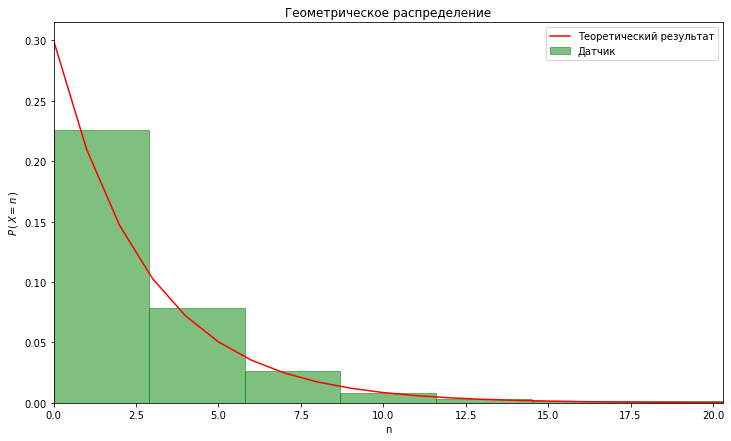

In [6]:
plt.figure(figsize=(12, 7))
p = 0.3
N = 1000
my_generator = geom(p, N)
plt.hist(my_generator, density=True, alpha = 0.5, edgecolor='g', color='g')
test_generator = []
for i in range(max(my_generator)):
    test_generator += [p * (1-p)**i]
plt.plot(range(max(my_generator)), test_generator, 'r')
plt.legend(['Теоретический результат', 'Датчик'], loc='upper right')
plt.xlabel('n')
plt.ylabel(r'$P\,(\,X=n\,)$')
plt.title('Геометрическое распределение')
alpha = 0.0005
plt.xlim([0, np.log(1-(1-alpha))/np.log(1-p) - 1]);
plt.show()

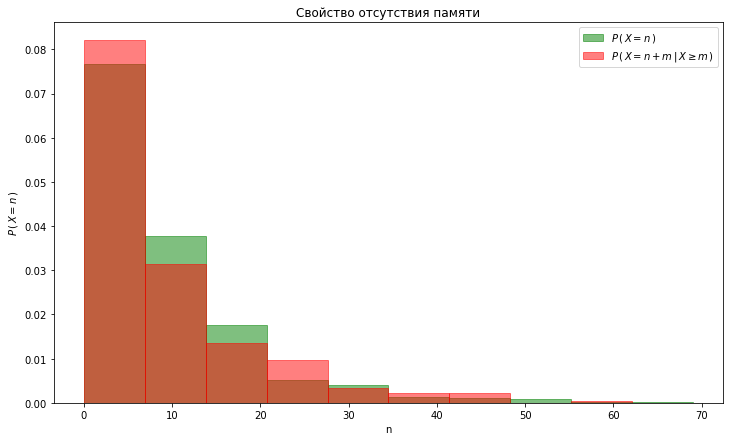

In [7]:
plt.figure(figsize=(12, 7))
p = 0.1
N = 1000
m = 10
my_generator = geom(p, N)
_, bins, _ = plt.hist(my_generator, density=True, alpha = 0.5, edgecolor='g', color='g')
plt.hist(my_generator[my_generator>=m]-m, density=True, alpha = 0.5, bins = bins, edgecolor='r', color='r')
plt.legend([r'$P\,(\,X=n\,)$', r'$P\,(\,X=n+m\,|\,X \geq m\,)$'], loc='upper right')
plt.xlabel('n')
plt.ylabel(r'$P\,(\,X=n\,)$')
plt.title('Свойство отсутствия памяти')
plt.show()

### 1.3 Игра в орлянку.

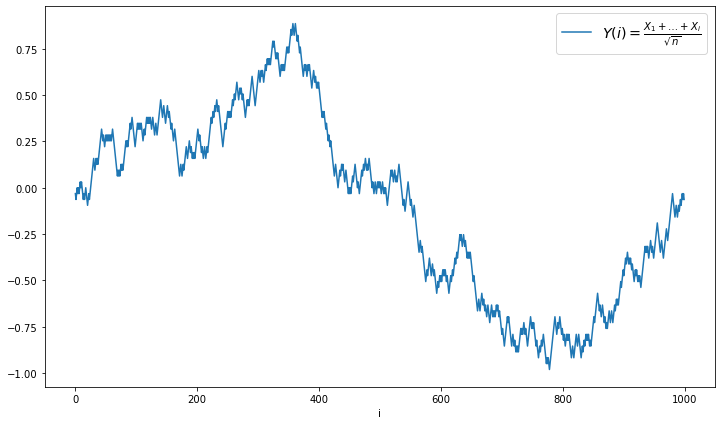

In [8]:
N = 1000
p = 0.5
plt.figure(figsize=(12, 7))
bernoulli_vector = (bernoulli(p, N) - 0.5)*2
plt.plot(range(N), np.cumsum(bernoulli_vector)/np.sqrt(N))
plt.xlabel(r'i')
plt.legend([r'$Y(i) = \frac{X_1 +\ldots+ X_i}{\sqrt{n}}$'], fontsize='x-large')
plt.show()

## Задание 2

### 2.1 Датчик сингулярного (лестница Кантора) распределения. Критерий Колмогорова.

In [9]:
def cantor(n=1, eps=10**(-9)):
    if eps > 1:
        m = 20
    else:
        m = 1 - math.ceil(np.log(eps)/np.log(3))
    bernoulli_vector = bernoulli(0.5, m, n)
    x = 2*3.**(-np.array(range(m+1)[1:]))
    x = np.tile(x, [n, 1]).T
    x = np.sum(bernoulli_vector * x, axis=0)
    
    F = 2.**(-np.array(range(m+1)[1:]))
    F = np.tile(F, [n, 1]).T
    F = np.sum(bernoulli_vector * F, axis=0)
    return x, F

In [10]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return x, y

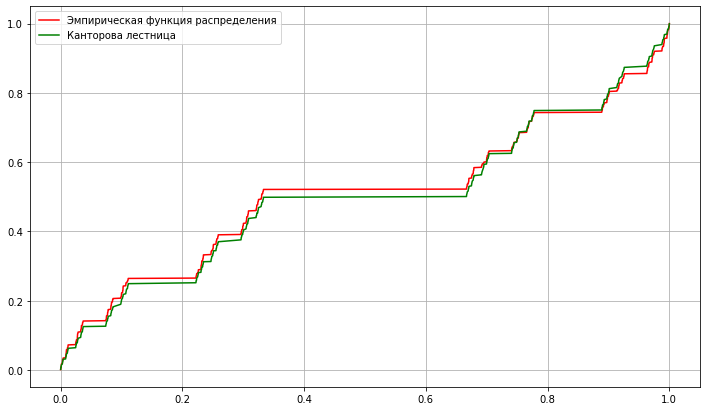

In [11]:
N = 1000
plt.figure(figsize=(12, 7))
gen_x, gen_F = cantor(N)
x, y = ecdf(gen_x)
plt.plot(x, y, 'r')
test_x, ind = np.unique(gen_x, return_index=True)
plt.plot(test_x, gen_F[ind], 'g')
plt.grid()
plt.legend(['Эмпирическая функция распределения', 'Канторова лестница'])
plt.show()

 Функция распределния Колмогорова: $$F_{K}(x) = 1 + 2\sum\limits_{k=1}^{\infty}(-1)^k\exp^{-2 k^2 x^2}$$

In [12]:
def kolmogorov_df(x):
    k = np.array(range(1, 100))
    if x < 0.05:
        return 0
    return 1 + 2*np.sum((-1)**k * np.exp(-2*(k**2)*x**2))

Статистика критерия Колмогорова: $$ D_{n} = \sup\limits_{x}|F_n(x) - F(x)|$$

In [13]:
def kolmogorov_test(x, F):
    n = len(x)
    emp_x, emp_F = ecdf(x)
    F = F[np.argsort(x)]
    _, ind = np.unique(emp_x, return_index=True)
    D = np.max(np.abs(F[ind]-emp_F[ind]))
    return kolmogorov_df(np.sqrt(n)*D)

In [14]:
print('p_value =', 1-kolmogorov_test(gen_x, gen_F))

p_value = 0.5037450467855198


In [15]:
alpha = [0.1, 0.05] 
n = [1000, 10000]
m = [1000, 10000]
res = pd.DataFrame(columns=['Количество экспериментов', 'Размер выборки',
                            'Уровень значимости', 'Частота принятия гипотезы'])
for cur_n in tqdm(n):
    for cur_m in m:
        for cur_alpha in alpha:
            count = 0
            for i in range(1, cur_n):
                x_gen, F_gen = cantor(cur_m)
                p_value = 1 - kolmogorov_test(x_gen, F_gen)
                if (p_value > cur_alpha):
                    count += 1
            res.loc[len(res)] = [cur_n, cur_m, cur_alpha, count/cur_n]

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [03:22<00:00, 101.07s/it]


In [16]:
res

,Количество экспериментов,Размер выборки,Уровень значимости,Частота принятия гипотезы
0,1000.0,1000.0,0.10,0.9050
1,1000.0,1000.0,0.05,0.9480
2,1000.0,10000.0,0.10,0.9030
3,1000.0,10000.0,0.05,0.9630
4,10000.0,1000.0,0.10,0.9091
5,10000.0,1000.0,0.05,0.9561
6,10000.0,10000.0,0.10,0.9027
7,10000.0,10000.0,0.05,0.9498


### 2.2 Свойство симметричности и самоподобия.

#### Свойство симметричности относительно $\frac{1}{2}$: $$F_{X}(x) = F_{1-X}(x)$$
Проверяем по критерию Смирнова: $H_0$ - две независимые выборки принадлежат одному и тому же распределению.

Статистика критерия Смирнова: $$ D_{n,m} = \sup\limits_{x}|F_n(x) - F_m(x)|$$

In [17]:
def smirnov_test(x1, x2):
    n = len(x1)
    m = len(x2)
    #x1 = np.unique(x1)
    #x2 = np.unique(x2)
    emp_x1, emp_F1 = ecdf(x1)
    emp_x2, emp_F2 = ecdf(x2)
    emp_x1, ind = np.unique(emp_x1, return_index=True)
    emp_F1 = np.insert(emp_F1[ind], 0, 0)
    emp_x1 = np.insert(emp_x1, 0, 0)
    emp_x2, ind = np.unique(emp_x2, return_index=True)
    emp_F2 = np.insert(emp_F2[ind], 0, 0)
    emp_x2 = np.insert(emp_x2, 0, 0)

    arr1 = emp_x1 - emp_x2[:, np.newaxis]
    idx1 = np.argmin(np.where(arr1 >= 0, arr1, 1), axis=0)
    arr2 = emp_x2 - emp_x1[:, np.newaxis]
    idx2 = np.argmin(np.where(arr2 >= 0, arr2, 1), axis=0)
    D = max(max(abs(emp_F1-emp_F2[idx1])), max(abs(emp_F2-emp_F1[idx2])))
    return kolmogorov_df(np.sqrt((n * m) / (n + m)) * D)

In [22]:
x1, _ = cantor(100)
x2, _ = cantor(1000)
x2 = [1-x for x in x2]
print('p_value =', 1-smirnov_test(x1, x2))

p_value = 0.9096696298100188


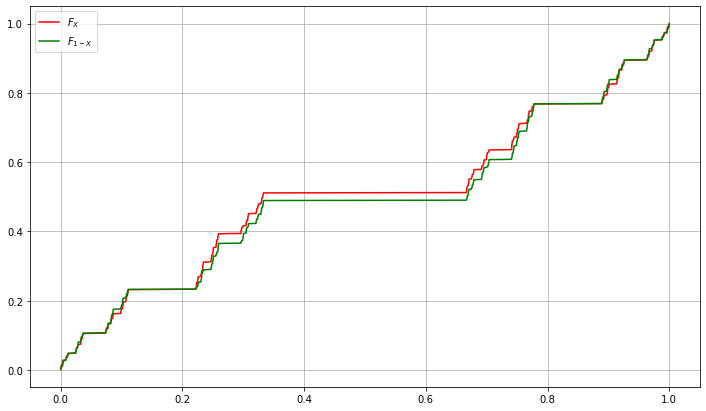

In [23]:
n = 1000
m = 1000
x1, _ = cantor(n)
x2 = [1-x for x in x1]
plt.figure(figsize=(12, 7))
x1, y1 = ecdf(x1)
x2, y2 = ecdf(x2)
plt.plot(x1, y1, 'r')
#test_x, ind = np.unique(gen_x, return_index=True)
plt.plot(x2, y2, 'g')
plt.grid()
plt.legend(['$F_X$', '$F_{1-X}$'])
plt.show()

In [28]:
### Будет долго работать!
alpha = [0.1, 0.05]
N = 1000 #количество испытаний
n = [1000, 10000]
m = [1000, 10000]
res = pd.DataFrame(columns=['Размер выборки $x_1$', 'Размер выборки $x_2$',
                            'Уровень значимости', 'Частота принятия гипотезы'])
for cur_n in tqdm(n):
    for cur_m in m:
        for cur_alpha in alpha:
            count = 0
            for i in range(1, N):
                x1, _ = cantor(cur_n)
                x2, _ = cantor(cur_m)
                x2 = [1-x for x in x2]
                p_value = 1 - smirnov_test(x1, x2)
                if (p_value > cur_alpha):
                    count += 1
            res.loc[len(res)] = [cur_n, cur_m, cur_alpha, count/N]

100%|████████████████████████████████████████████████████████████████████████████████| 2/2 [2:56:58<00:00, 5309.45s/it]


In [29]:
res

,Размер выборки $x_1$,Размер выборки $x_2$,Уровень значимости,Частота принятия гипотезы
0,1000.0,1000.0,0.10,0.899
1,1000.0,1000.0,0.05,0.949
2,1000.0,10000.0,0.10,0.906
3,1000.0,10000.0,0.05,0.953
4,10000.0,1000.0,0.10,0.900
5,10000.0,1000.0,0.05,0.948
6,10000.0,10000.0,0.10,0.904
7,10000.0,10000.0,0.05,0.947


#### Свойство самоподобия относительно деления на 3: $$F_{\frac{X}{3}}(x) = F_{X\,|\,X\in[0, \frac{1}{3}]}(x)$$

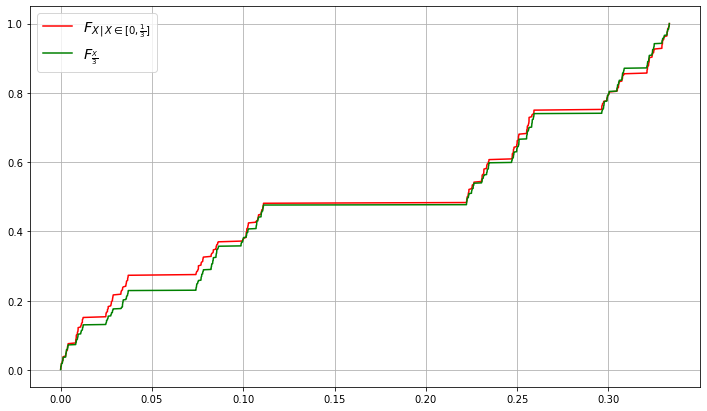

In [27]:
n = 1000
m = 1000
x1, _ = cantor(n)
x2 = [x/3 for x in x1]
x1 = x1[x1 < 1/3]
plt.figure(figsize=(12, 7))
x1, y1 = ecdf(x1)
x2, y2 = ecdf(x2)
plt.plot(x1, y1, 'r')
plt.plot(x2, y2, 'g')
plt.grid()
plt.legend([r'$F_{X\,|\,X\in[0, \frac{1}{3}]}$', r'$F_{\frac{X}{3}}$'], fontsize='x-large')
plt.show()

In [30]:
### Будет долго работать!
alpha = [0.1, 0.05]
N = 1000 #количество испытаний
n = [1000, 10000]
m = [1000, 10000]
res = pd.DataFrame(columns=['Размер выборки $x_1$', 'Размер выборки $x_2$',
                            'Уровень значимости', 'Частота принятия гипотезы'])
for cur_n in tqdm(n):
    for cur_m in m:
        for cur_alpha in alpha:
            count = 0
            for i in range(1, N):
                x1, _ = cantor(cur_n)
                x2, _ = cantor(cur_m)
                x1 = x1[x1 < 1/3]
                x2 = [x/3 for x in x2]
                p_value = 1 - smirnov_test(x1, x2)
                if (p_value > cur_alpha):
                    count += 1
            res.loc[len(res)] = [cur_n, cur_m, cur_alpha, count/N]

100%|████████████████████████████████████████████████████████████████████████████████| 2/2 [1:18:35<00:00, 2357.72s/it]


In [31]:
res

,Размер выборки $x_1$,Размер выборки $x_2$,Уровень значимости,Частота принятия гипотезы
0,1000.0,1000.0,0.10,0.901
1,1000.0,1000.0,0.05,0.946
2,1000.0,10000.0,0.10,0.906
3,1000.0,10000.0,0.05,0.956
4,10000.0,1000.0,0.10,0.898
5,10000.0,1000.0,0.05,0.955
6,10000.0,10000.0,0.10,0.893
7,10000.0,10000.0,0.05,0.939


### 2.3 Математическое ожидание и дисперсия

$$\mathbb{E} X = \mathbb{E} \sum\limits_{k=1}^{\infty}\frac{2\xi_k}{3^k} = \sum\limits_{k=1}^{\infty}\frac{2}{3^k} \mathbb{E} \xi_k = \frac{1}{2}\sum\limits_{k=1}^{\infty}\frac{2}{3^k} = \frac{1}{2}$$

$$\mathbb{V}ar X = \mathbb{V}ar \sum\limits_{k=1}^{\infty}\frac{2\xi_k}{3^k} = \sum\limits_{k=1}^{\infty}\left(\frac{2}{3^k}\right)^2 \mathbb{V}ar \xi_k = 
\frac{1}{4}\sum\limits_{k=1}^{\infty}\frac{4}{9^k} = \frac{1}{8}$$

Сравним с выборочным средним: $$\overline{X} = \frac{1}{n}\sum\limits_{i=1}^{n}X_{i}$$
и несмещенной выборочной дисперсией:$$S^2 = \frac{1}{n-1}\sum\limits_{i=1}^{n}(X_i - \overline{X})^2.$$

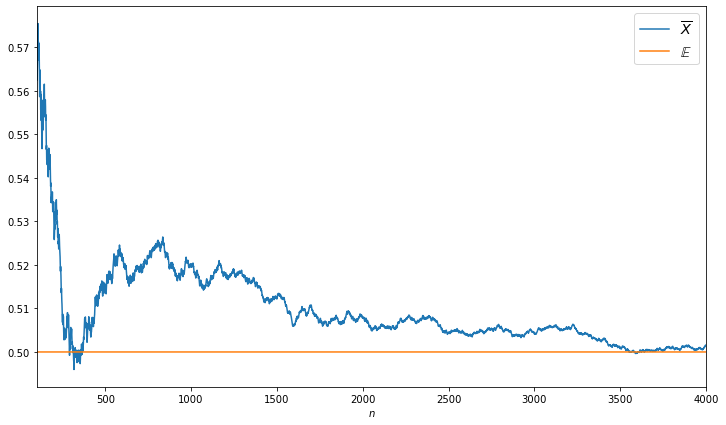

In [76]:
n1  = 100
n2 = 4000
n = np.array(range(1, n2+1))

X, _ = cantor(n2)
mean_X = np.cumsum(X)/n
plt.figure(figsize=(12, 7))
plt.plot(n[n1-1:], mean_X[n1-1:])
plt.plot(n[n1-1:], np.ones(n2+1-n1)*(1/2))
plt.xlabel(r'$n$')
plt.xlim(n1, n2)
plt.legend([r'$\overline{X}$', r'$\mathbb{E}$'],  fontsize='x-large')
plt.show()

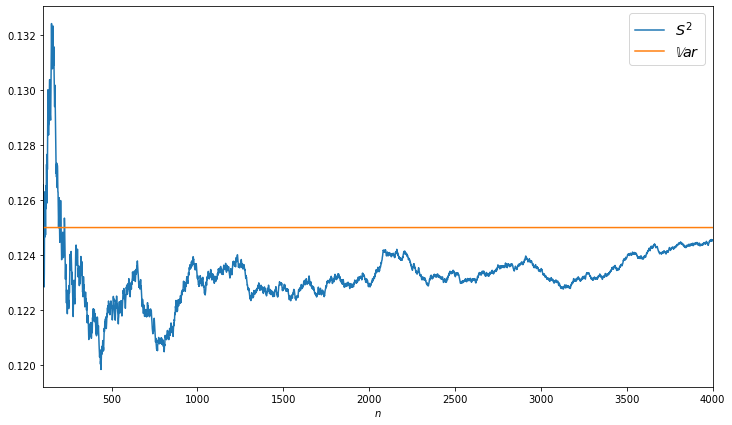

In [79]:
S = []
for i in range(n1, n2):
    S += [sum((X[:i] - mean_X[i])**2)/(i)]
plt.figure(figsize=(12, 7))
plt.plot(range(n1, n2), S, label=r'$S^2$')
plt.plot(range(n1, n2), np.ones(n2-n1)*(1/8), label=r'$\mathbb{V}ar$')
plt.xlabel(r'$n$')
plt.xlim(n1, n2)
plt.legend(fontsize='x-large')
plt.show()

## Задание 3.

### 3.1 Экспоненциальное распределение. Свойство отсутствия памяти.

Функция распределения:
$$
\begin{equation*}
F_X(x) = 
 \begin{cases}
   1 - e^{-\lambda x} &\text{, при $x \geq 0$}\\
   0 &\text{, при $x < 0$}
 \end{cases}
\end{equation*}
$$

Пусть $\xi \sim \mathbb{U}_{[0, 1]}$. 
Тогда, если 
$$X = F_x^{-1}(\xi) = -\frac{1}{\lambda}ln(1-\xi),$$
то $X \sim Exp(\lambda)$.

In [92]:
def Exp(lam, *shape):
    if len(shape) == 1:
        xi = rand.uniform(0, 1, shape[0])
    else:
        xi = rand.uniform(0, 1, shape)
    return -(1 / lam)*np.log(1 - xi)

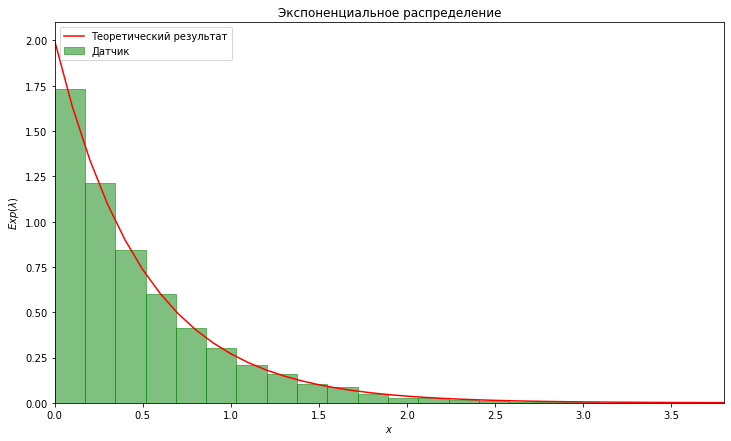

In [114]:
plt.figure(figsize=(12, 7))
n = 10000
lam = 2
my_generator = Exp(lam, n)
plt.hist(my_generator, density=True, alpha = 0.5, edgecolor='g', color='g', bins=30)
test_generator = lam*np.exp(-lam*np.arange(0, n, 0.1))
plt.plot(np.arange(0, n, 0.1), test_generator, 'r')
plt.legend(['Теоретический результат', 'Датчик'])
plt.xlabel(r'$x$')
plt.ylabel(r'$Exp(\lambda)$')
plt.title('Экспоненциальное распределение')

alpha = 0.0005
plt.xlim(0, -(1/lam)*np.log(1-(1-alpha)))
plt.show()

#### Свойство отсутствия памяти:
$$\mathbb{P}(X \,\geqslant\, s+t\,|\,X\,\geqslant\,t) = \mathbb{P}(X\,\geqslant\,s), \forall t \neq 0, s$$

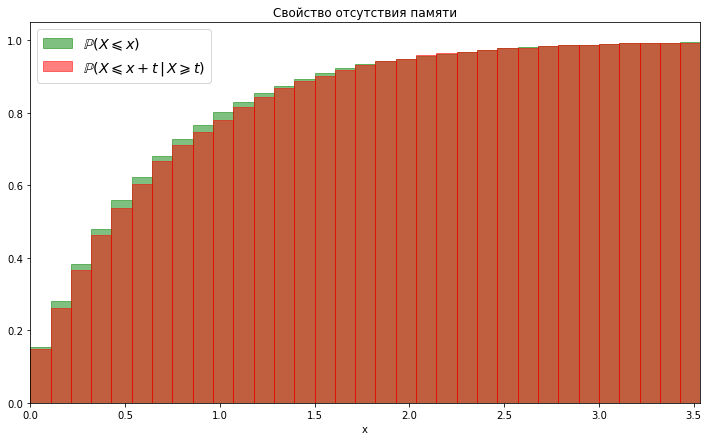

In [131]:
plt.figure(figsize=(12, 7))
lam = 1.5
N = 10000
m = 1
my_generator = Exp(lam, N)
_, bins, _ = plt.hist(my_generator, density=True, cumulative=True, alpha = 0.5, edgecolor='g', color='g', bins=60)
plt.hist(my_generator[my_generator>m]-m, density=True, cumulative=True, alpha = 0.5, bins = bins, edgecolor='r', color='r')
plt.legend([r'$\mathbb{P}(X\,\leqslant\,x)$', r'$\mathbb{P}(X \,\leqslant\, x+t\,|\,X\,\geqslant\,t)$'], fontsize='x-large')
plt.xlabel('x')
plt.title('Свойство отсутствия памяти')
alpha = 0.005
plt.xlim(0, -(1/lam)*np.log(1-(1-alpha)))
plt.show()

$$Y = \min{(X_1, X_2, \dots, X_n)}, \text{ где } X_i\sim Exp(\lambda_i) \, \forall i = \overline{1, n}$$

$$F_Y(x) = \mathbb{P}(Y < x) = \mathbb{P}(min_{i = \overline{1, n}} < x) = $$
$$ = 1 - \mathbb{P}(min_{i = \overline{1, n}} \geqslant x) = 1 - \mathbb{P}(X_1 \geqslant x, \dots, X_n \geqslant x) = 1 - \prod\limits_{i = 1}^{n}\mathbb{P}(X_i \geqslant x) = $$
$$= 1 - \prod\limits_{i = 1}^{n}(1 - F_{X_i}(x)) = 1 - \prod\limits_{i = 1}^{n}e^{\lambda_i x} = 1 - e^{\sum\limits_{i=1}^n \lambda_i x}$$

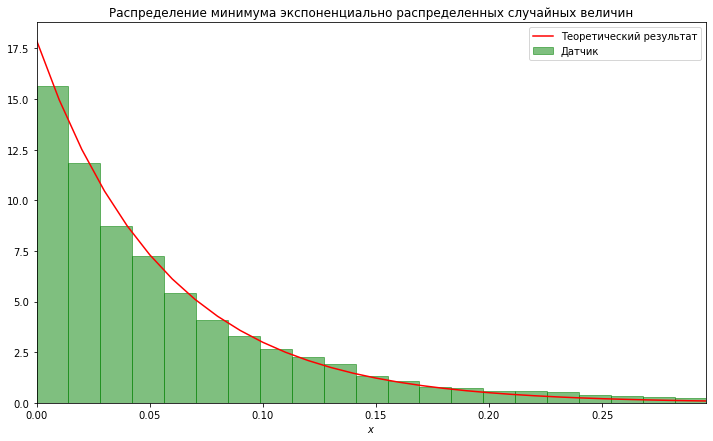

In [148]:
plt.figure(figsize=(12, 7))
n = 10000
lam = [1, 2, 3, 1.5, 1.3, 2.2, 1, 1.6, 1.8, 2.5]
my_generator = np.array([])
for lam_i in lam:
    my_generator = np.append(my_generator, Exp(lam_i, n), axis=0)
my_generator = my_generator.reshape(n,-1)
my_generator = np.min(my_generator, axis=1)
plt.hist(my_generator, density=True, alpha = 0.5, edgecolor='g', color='g', bins=50)

test_generator = np.sum(lam)*np.exp(-np.sum(lam)*np.arange(0, n, 0.01))
plt.plot(np.arange(0, n, 0.01), test_generator, 'r')
plt.legend(['Теоретический результат', 'Датчик'])
plt.xlabel(r'$x$')
plt.title('Распределение минимума экспоненциально распределенных случайных величин')

alpha = 0.005
plt.xlim(0, -(1/np.sum(lam))*np.log(1-(1-alpha)))
plt.show()

### 3.2 Датчик пуассоновского распределения

$X \sim Pois(\lambda)$, если $\mathbb{P}(X=k) = \frac{\lambda^k}{k!}e^{-\lambda}$

Пусть $S_n = \sum\limits_{i=1}^n\xi_i$, где $\xi_i \sim Exp(\lambda) \, \forall i = \overline{1, n}.$ Тогда:
$$F_{S_n}(x) = 1 - e^{-\lambda x}\sum\limits_{j=0}^{n-1}\frac{\lambda^j x^j}{k!}.$$

Пусть $X = max{\{n \geqslant 0 \,|\,S_n < t\}}$. Тогда $X \sim Pois(\lambda t) = Pois(t)$ при $\lambda=1$.

In [190]:
def poisson(lam, size=1):
    n = int(lam + 3*lam + 3*lam)
    Sn = Exp(1, size, n)
    Sn = np.cumsum(Sn, axis=1)
    return np.sum(Sn < lam, axis=1)

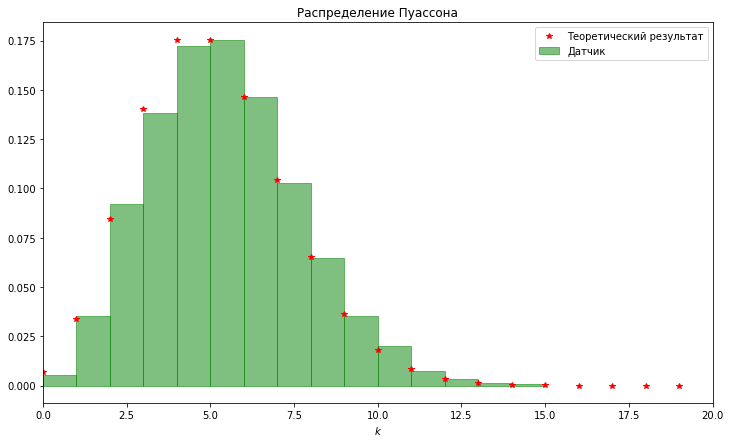

In [214]:
n = 10000
lam = 5
plt.figure(figsize=(12, 7))
my_generator = poisson(lam, n)
plt.hist(my_generator, density=True, alpha = 0.5, edgecolor='g', color='g', bins=15, label='Датчик')
k = np.arange(0, int(lam + 3*lam), 1)
test_generator = [np.exp(-lam)*(lam**x)/np.math.factorial(x) for x in k]
plt.plot(k, test_generator, '*r', label='Теоретический результат')
plt.xlim(0, int(lam + 3*lam))
plt.xlabel(r'$k$')
plt.legend()
plt.title('Распределение Пуассона')
plt.show()

### 3.3 Датчик пуассоновского распределения как предел биноминального распределения.

Пусть $\xi \sim Bi(n, p)$, т.е. $$\mathbb{P}_n(\xi = k) = C_n^k p^k(1-p)^{n-k}.$$ 
Тогда:
$$\lim\limits_{n \rightarrow \infty}\mathbb{P}_n(k) = \frac{\lambda^k}{k!}e^{-\lambda}.$$

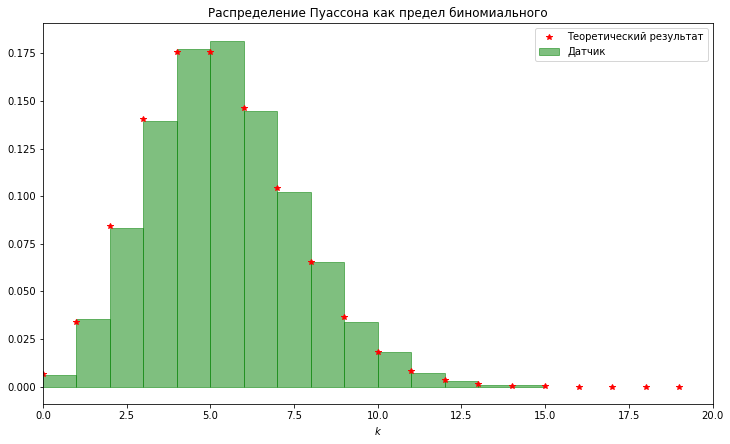

In [220]:
n = 10000
lam = 5
bi_n = 100*lam
bi_p = lam/bi_n

plt.figure(figsize=(12, 7))

my_generator = binomial(bi_p, bi_n, n)
plt.hist(my_generator, density=True, alpha = 0.5, edgecolor='g', color='g', bins=15, label='Датчик')
k = np.arange(0, int(lam + 3*lam), 1)
test_generator = [np.exp(-lam)*(lam**x)/np.math.factorial(x) for x in k]
plt.plot(k, test_generator, '*r', label='Теоретический результат')
plt.xlim(0, int(lam + 3*lam))
plt.xlabel(r'$k$')
plt.legend()
plt.title('Распределение Пуассона как предел биномиального')
plt.show()

#### Критерий Пирсона:
$$H_0 - \text{ выборка } \xi_1, \dots, \xi_n \text{ подчиняется закону распределения }\mathbb{P},$$
$$r - \text{количество различных элементов выборки}$$
$$p_k = \mathbb{P}(\xi=k),$$
$$n_k - \text{количество элементов выборки, равных }k,$$
$$\text{статистика: }X_n^2 = n\sum\limits_{k=1}^r\frac{(\frac{n_k}{n} - p_k)^2}{p_k}.$$

$$F_{\chi_{r-1}^2}(x) = \frac{\gamma(\frac{r-1}{2}, \frac{x}{2})}{\Gamma(\frac{r-1}{2})}$$

In [297]:
def pirson_test(x, P):
    n = len(x)
    sorted_x = np.sort(np.unique(x))
    n_k, _ = np.histogram(x, bins = np.append(sorted_x, sorted_x[-1]+1))
    p_k = P(sorted_x)
    chi_2 = n*np.sum((n_k/n - p_k)**2 / p_k)
    freedom_degrees = len(sorted_x) - 1
    return chi_2, freedom_degrees

In [602]:
n = 100 #при больших числах переполнение при возведении в степень 
lam = 3
bi_n = 1000*lam
bi_p = lam/bi_n
my_generator = binomial(bi_p, bi_n, n)
P = lambda k:[np.exp(-lam)*(lam**x)/np.math.factorial(x) for x in k]
chi_2, df = pirson_test(my_generator, P)

print('Хи-квадрат: ', chi_2)
print('Степеней свободы: ', freedom_degrees)
print('Критическое значение: ', chi2.ppf(1 - 0.05, df=df))

Хи-квадрат:  16.614116647429118
Степеней свободы:  15
Критическое значение:  12.591587243743977


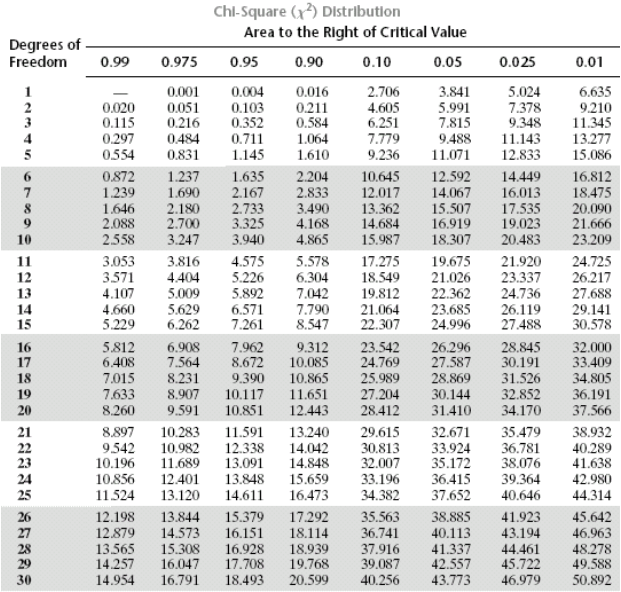

In [392]:
alpha = [0.05] 
n = [100, 1000]
m = [1000]
lam = 1.5
bi_n = 1000*lam
bi_p = lam/bi_n

P = lambda k:[np.exp(-lam)*(lam**x)/np.math.factorial(x) for x in k]

res = pd.DataFrame(columns=['Количество экспериментов', 'Размер выборки',
                            'Уровень значимости', 'Частота принятия гипотезы'])
for cur_n in tqdm(n):
    for cur_m in m:
        for cur_alpha in alpha:
            count = 0
            for i in range(1, cur_n):
                my_generator = binomial(bi_p, int(bi_n), cur_m)
                chi_2, df = pirson_test(my_generator, P)
                if (chi_2 < 25):
                    count += 1
            res.loc[len(res)] = [cur_n, cur_m, cur_alpha, count/cur_n]

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:25<00:00, 12.54s/it]


In [393]:
res

,Количество экспериментов,Размер выборки,Уровень значимости,Частота принятия гипотезы
0,100.0,1000.0,0.05,0.940
1,1000.0,1000.0,0.05,0.959


### 3.4 Датчик нормального распределения

Пусть $$X \sim N(\mu, \sigma^2),$$
тогда:
$$
\rho_X(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\dfrac{(x-\mu)^2}{2\sigma^2}}.
$$

Пусть $\eta \sim Exp(1), \,\xi \sim U[0, 2\pi],$ тогда случайная величина $Z = \sqrt{2\eta}\sin{\xi}$ имеет стандартное распределение:
$$
F_Z(x) = \iint\limits_{\{(\eta, \xi)|\sqrt{2\eta}\sin{\xi}<x\}}\frac{e^{-\eta}}{2\pi}d\eta d\xi = \left\{\eta = \frac{r^2}{2}\right\} = $$ $$ =\iint\limits_{\{(r, \xi)\,|\,r\sin{\xi}<x\}}\frac{e^{-\frac{r^2}{2}}}{2\pi}r drd\eta = \left\{X = r\cos{\xi}, Y = r\sin{\xi}\right\} =$$
$$
=\iint\limits_{\{(X, Y)|Y<x\}}\frac{e^{-\frac{X^2}{2}}e^{-\frac{Y^2}{2}}}{2\pi}dXdY =
\int\limits_{-\infty}^{+\infty}\frac{e^{-\frac{X^2}{2}}}{\sqrt{2\pi}}dX\int\limits_{-\infty}^x\frac{e^{-\frac{Y^2}{2}}}{\sqrt{2\pi}}dY = $$
$$= \int\limits_{-\infty}^x\frac{e^{-\frac{Y^2}{2}}}{\sqrt{2\pi}}dY
$$

In [364]:
def stdn(*shape):
    if len(shape) == 1:
        return np.sqrt(2 * Exp(1, shape)) * np.sin(rand.uniform(0, 2*np.pi, shape[0]))
    else:
        return np.sqrt(2 * Exp(1, shape)) * np.sin(rand.uniform(0, 2*np.pi, shape))

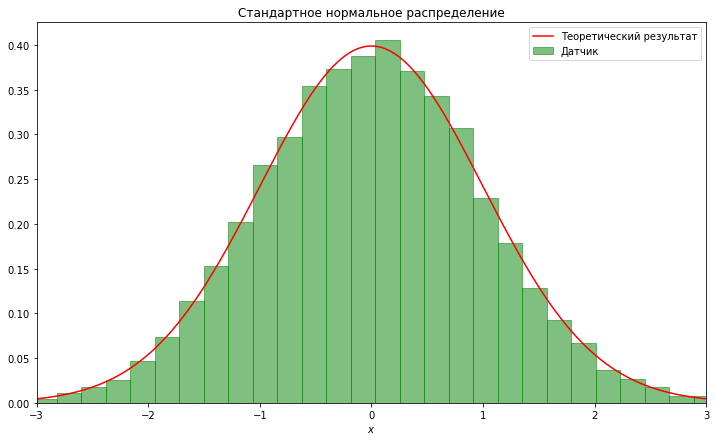

In [394]:
n = 10000

plt.figure(figsize=(12, 7))

my_generator = stdn(n)
plt.hist(my_generator, density=True, alpha = 0.5, edgecolor='g', color='g', bins=35, label='Датчик')
x = np.arange(-3, 3, 0.01)
test_generator = np.exp(-x**2/2)/np.sqrt(2*np.pi)
plt.plot(x, test_generator, 'r', label='Теоретический результат')
plt.xlim(-3, 3)
plt.xlabel(r'$x$')
plt.legend()
plt.title('Стандартное нормальное распределение')
plt.show()

#### Критерий Стьюдента:
$$H_0 \text{ - математическое ожидание выборки } X = \{X_1, \dots X_n\}\text{ равно }\mu.$$
$$t = \frac{\overline{X} - \mu}{\frac{S_X}{\sqrt{n}}}.$$

In [368]:
def student_test(x, mu):
    n = len(x)
    mean = np.sum(x)/n
    var  = np.sqrt(np.sum((x - mean)**2)/(n - 1))
    t = np.sqrt(n) * (mean - mu) / var
    df = n - 1
    return t, df

In [395]:
t, df = student_test(my_generator, 0)
print('t-value: ', t)
print('Степеней свободы: ', df)

t-value:  0.010242227845958957
Степеней свободы:  9999


In [397]:
from scipy.stats import t

t.interval(0.95, df=df)

(-1.9602012636213575, 1.9602012636213575)

In [378]:
alpha = [0.05, 0.1] 
n = [1000, 10000]
m = [1000, 10000]

res = pd.DataFrame(columns=['Количество экспериментов', 'Размер выборки',
                            'Уровень значимости', 'Частота принятия гипотезы'])
for cur_n in tqdm(n):
    for cur_m in m:
        for cur_alpha in alpha:
            count = 0
            for i in range(1, cur_n):
                my_generator = stdn(cur_m)
                t_stat, df = student_test(my_generator, 0)
                a, b = t.interval(1-cur_alpha, df=df)
                if (t_stat > a and t_stat < b):
                    count += 1
            res.loc[len(res)] = [cur_n, cur_m, cur_alpha, count/cur_n]

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:27<00:00, 13.56s/it]


In [379]:
res

,Количество экспериментов,Размер выборки,Уровень значимости,Частота принятия гипотезы
0,1000.0,1000.0,0.05,0.9530
1,1000.0,1000.0,0.10,0.9020
2,1000.0,10000.0,0.05,0.9560
3,1000.0,10000.0,0.10,0.9210
4,10000.0,1000.0,0.05,0.9502
5,10000.0,1000.0,0.10,0.8991
6,10000.0,10000.0,0.05,0.9500
7,10000.0,10000.0,0.10,0.9071


#### Критерий Фишера:
$$ H_0 \text{- дисперсии выборок } X = X_1, \dots, X_n \, и\,  Y = Y_1, \dots, Y_n \text{ равны}. $$
$$F = \frac{S^2_X}{S^2_Y},\,где\, S^2_X - \text{выборочная дисперсия.}$$

In [398]:
def fisher_test(x, y):
    n = len(x)
    m = len(y)
    x_var = np.sum((x - np.mean(x))**2)/(n - 1)
    y_var = np.sum((y - np.mean(y))**2)/(m - 1) 
    F = x_var / y_var
    df = (n- 1, m - 1)
    return F, df

In [416]:
n = 1000
my_generator = stdn(n)
F, df = fisher_test(my_generator, (bernoulli(p, n) - 0.5)*2)
print('F: ', F)
print('Степеней свободы: ', df)

F:  0.9275164390838616
Степеней свободы:  (999, 999)


In [418]:
from scipy.stats import f

f.ppf(0.95, df[0], df[1])

1.1097461378149511

In [419]:
alpha = [0.05, 0.1] 
n = [1000, 10000]
m = [1000, 10000]

res = pd.DataFrame(columns=['Количество экспериментов', 'Размер выборки',
                            'Уровень значимости', 'Частота принятия гипотезы'])
for cur_n in tqdm(n):
    for cur_m in m:
        for cur_alpha in alpha:
            count = 0
            for i in range(1, cur_n):
                my_generator = stdn(cur_m)
                F, df = fisher_test(my_generator, (bernoulli(p, cur_m) - 0.5)*2)
                if F > f.ppf(cur_alpha/2, df[0], df[1]) and F < f.ppf(1-cur_alpha/2, df[0], df[1]):
                    count += 1
            res.loc[len(res)] = [cur_n, cur_m, cur_alpha, count/cur_n]

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:33<00:00, 16.81s/it]


In [420]:
res

,Количество экспериментов,Размер выборки,Уровень значимости,Частота принятия гипотезы
0,1000.0,1000.0,0.05,0.9910
1,1000.0,1000.0,0.10,0.9840
2,1000.0,10000.0,0.05,0.9940
3,1000.0,10000.0,0.10,0.9670
4,10000.0,1000.0,0.05,0.9958
5,10000.0,1000.0,0.10,0.9789
6,10000.0,10000.0,0.05,0.9953
7,10000.0,10000.0,0.10,0.9797


## Задание 4.

### 4.1 Датчик распределения Коши.

Пусть $X \sim C(a, b)$, тогда:
$$
F_X(x) = \frac{1}{\pi}arctg{\left(\frac{x-a}{b}\right)} + \frac{1}{2}, \,f(x) = \frac{1}{\pi}\left( \frac{b}{(x-a)^2 + b^2}\right).
$$

Метод обратной функции: пусть $\eta \sim U[0, 1]$, тогда
$$X = F_X^{-1}(\eta) = a +  b\,tg \left(\pi\left (\eta - \frac{1}{2}\right)\right).$$

In [421]:
def cauchy(a, b, *shape):
    if len(shape) == 1:
        return a + b*np.tan(np.pi*(rand.uniform(0, 1, shape[0]) - 0.5))
    else:
        return a + b*np.tan(np.pi*(rand.uniform(0, 1, shape) - 0.5))

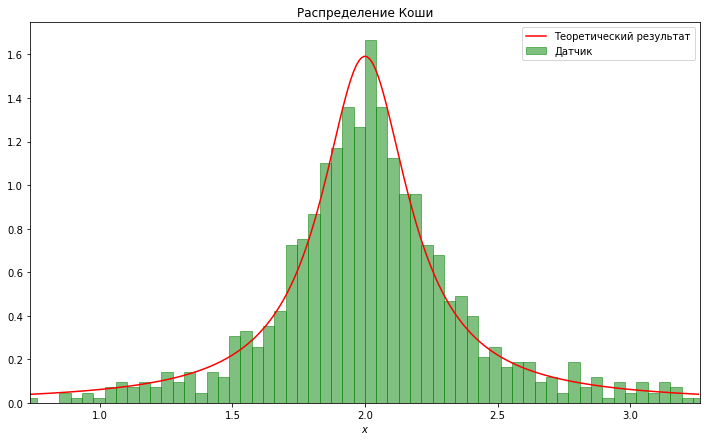

In [438]:
a = 2
b = 0.2
n = 1000

plt.figure(figsize=(12, 7))

my_generator = cauchy(a, b, n)
# нужно задавать большое значение для параметра bins
plt.hist(my_generator, density=True, alpha = 0.5, edgecolor='g', color='g', label='Датчик', bins = 10000)

alpha = 0.05
f_inv = lambda x: a + b*np.tan(np.pi * (x - 0.5))
x = np.arange(f_inv(alpha), f_inv(1 - alpha), 0.01)
test_generator = 1/np.pi * (b / ((x-a)**2 + b**2))
plt.plot(x, test_generator, 'r', label='Теоретический результат')
plt.xlim(f_inv(alpha), f_inv(1 - alpha))
plt.xlabel(r'$x$')
plt.legend()
plt.title('Распределение Коши')
plt.show()

### 4.2 Метод фон Неймана.

In [447]:
def stdn_FN(size):
    a = 0
    b = 1
    k = np.sqrt(2*np.pi / np.exp(1))
    density_c = lambda x: (1/np.pi) * b/((x-a)**2 + b**2)
    density_n = lambda x: np.exp(-x**2/2) / np.sqrt(2*np.pi)
    
    res = np.array([])
    while len(res) < size:
        xi = cauchy(a, b, 1)
        p = density_n(xi) / (k * density_c(xi))
        if bernoulli(p, 1) == 1:
            res = np.append(res, xi)
    return res

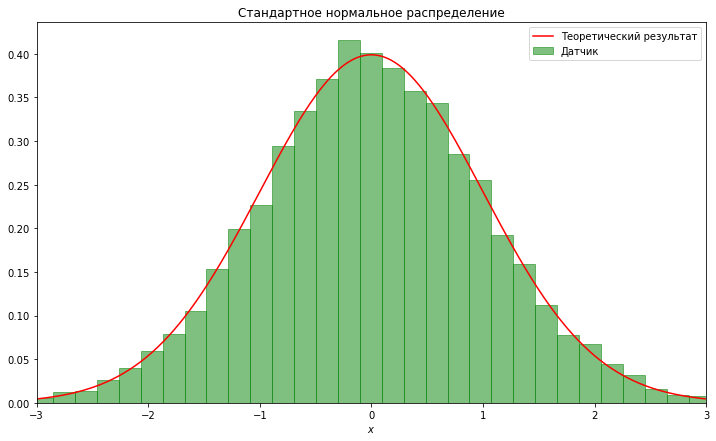

In [451]:
n = 10000

plt.figure(figsize=(12, 7))

my_generator = stdn_FN(n)
plt.hist(my_generator, density=True, alpha = 0.5, edgecolor='g', color='g', label='Датчик', bins = 40)

x = np.arange(-3, 3, 0.01)
test_generator = np.exp(-x**2/2)/np.sqrt(2*np.pi)
plt.plot(x, test_generator, 'r', label='Теоретический результат')
plt.xlim(-3, 3)
plt.xlabel(r'$x$')
plt.legend()
plt.title('Стандартное нормальное распределение')
plt.show()

$X \sim N(\mu, \sigma^2) \,:$
$$
F_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\int\limits_{-\infty}^{x}e^{-\frac{(t-\mu)^2}{2\sigma^2}}dt = \left\{\xi = \frac{t-\mu}{\sigma}\right\} = \frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^{\frac{x-\mu}{\sigma}}e^{-\frac{\xi^2}{2}}d\xi = F_Y\left(\frac{x-\mu}{\sigma}\right),
$$
где $Y \sim N(0, 1).$

In [493]:
def modified_normplot(x):
    plt.figure(figsize=(12, 7))
    stats.probplot(x, dist='norm', plot=plt)
    ticks_perc=[0.01, 0.05, 0.10, 0.20, 0.50, 0.80, 0.90, 0.95, 0.99]
    ticks_quan=[stats.norm.ppf(i) for i in ticks_perc]
    plt.yticks(ticks_quan,ticks_perc)
    plt.xlabel('Ordered values')
    plt.ylabel('Quantiles')
    plt.title('Normal probability plot')
    plt.grid()
    plt.show()

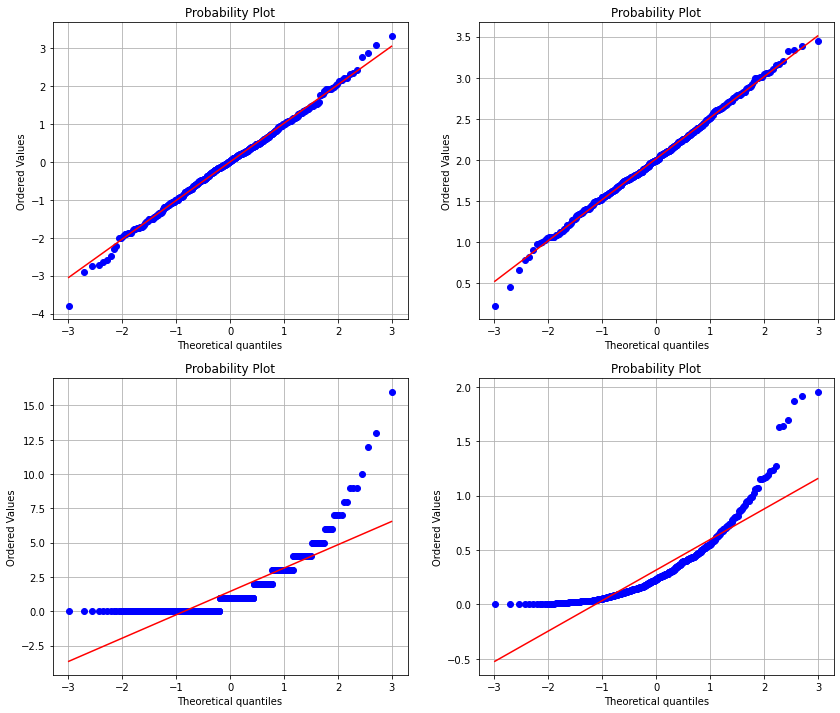

In [494]:
n = 500
fig = plt.figure(figsize=(14, 12))
fig.add_subplot(2, 2, 1)
stats.probplot(stdn_FN(n), dist='norm', plot=plt)
plt.grid()

fig.add_subplot(2, 2, 2)
stats.probplot(stdn_FN(n)*0.5 + 2, dist='norm', plot=plt)
plt.grid()

fig.add_subplot(2, 2, 3)
stats.probplot(geom(0.4, n), dist='norm', plot=plt)
plt.grid()

fig.add_subplot(2, 2, 4)
stats.probplot(Exp(3, n), dist='norm', plot=plt)
plt.grid()

plt.show()

### 4.3 Сравнение времени работы метода моделирования парами и метода фон Неймана.

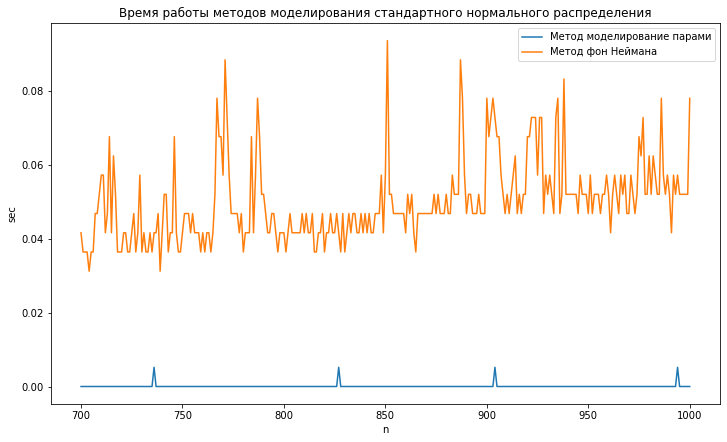

In [512]:
import time

n1 = 700
n2 = 1000
time1 = []
for cur_n in range(n1, n2+1):
    iter_time = 0
    for i in range(3):
        start = time.process_time()
        stdn(cur_n)
        iter_time += time.process_time()-start
    time1 += [iter_time/3]

time2 = []
for cur_n in range(n1, n2+1):
    iter_time = 0
    for i in range(3):
        start = time.process_time()
        stdn_FN(cur_n)
        iter_time += time.process_time()-start
    time2 += [iter_time/3]
    
plt.figure(figsize=(12, 7))
plt.plot(range(n1, n2+1), time1, label='Метод моделирование парами')
plt.plot(range(n1, n2+1), time2, label='Метод фон Неймана')
plt.xlabel('n')
plt.ylabel('sec')
plt.legend()
plt.title('Время работы методов моделирования стандартного нормального распределения')
plt.show()

## Задание 5.

### 5.1 Эмпирическая проверка ЗБЧ и ЦПТ.

#### Закон больших чисел:  
Пусть $X_1, \dots, X_n, \dots$ - последовательность н.о.р.с.в., определенных на одном вероятностном пространстве $(\Omega, F, \mathbb{P}),\, \mathbb{E}X_i = \mu \,\,\forall i = 1, 2, \dots$  
Тогда, если $S_n = \sum\limits_{i=1}^{n}X_i$, то
$$
\forall \varepsilon > 0 \,\lim\limits_{n \rightarrow \infty} \mathbb{P}\left(\left|\,\frac{S_n}{n} - \mu\,\right| < \varepsilon\right) = 1.
$$

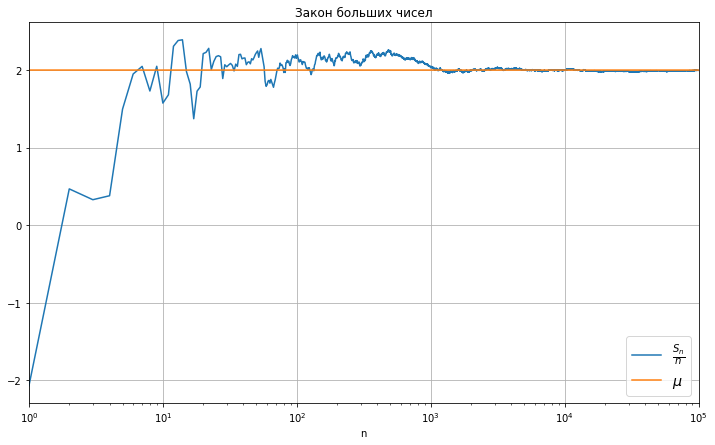

In [532]:
size = 100000
n = range(1, size+1)
mu = 2
sigma = 3

val = sigma*np.random.randn(size) + mu

fig = plt.figure(figsize=(12, 7))
plt.semilogx(n, np.cumsum(val)/n, label = r'$\frac{S_n}{n}$')
plt.semilogx(n, np.ones(size)*mu, label = r'$\mu$')
plt.xlim(1, size)
plt.grid()
plt.legend(fontsize = 'x-large')
plt.xlabel('n')
plt.title('Закон больших чисел')
plt.show()

#### Центральная предельная теорема:  
Пусть $X_1, \dots, X_n, \dots$ - последовательность н.о.р.с.в., определенных на одном вероятностном пространстве $(\Omega, F, \mathbb{P}),\, $ $\mathbb{E}X_i = \mu, \,\,\mathbb{V}ar X_i = \sigma^2 \neq 0 \,\,\forall i = 1, 2, \dots$  
Тогда, если $Y_n = \dfrac{S_n - \mu n}{\sigma \sqrt{n}}$, то
$$
\lim\limits_{n \rightarrow \infty}\mathbb{P}(Y_n < x) = \frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^x e^{-\frac{t^2}{2}}\,dt.
$$

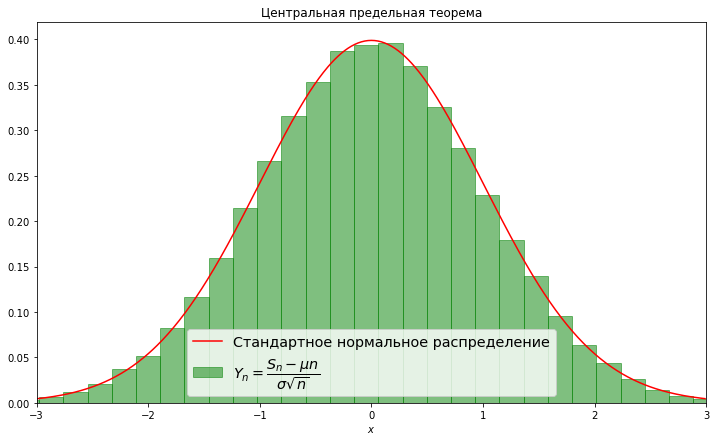

In [534]:
size = 100000
n = 1000
mu = 2
sigma = 3

x = sigma*np.random.randn(n, size) + mu
S_n = np.sum(x, axis=0)
Y_n = (S_n - mu*n) / np.sqrt(n*sigma**2)

fig = plt.figure(figsize=(12, 7))
plt.hist(Y_n, density=True, alpha = 0.5, edgecolor='g', color='g',
         label=r'$Y_n = \dfrac{S_n - \mu n}{\sigma \sqrt{n}}$', bins = 40)
x = np.arange(-3, 3, 0.01)
test_generator = np.exp(-x**2/2)/np.sqrt(2*np.pi)
plt.plot(x, test_generator, 'r', label='Стандартное нормальное распределение')
plt.xlim(-3, 3)
plt.xlabel(r'$x$')
plt.legend(fontsize = 'x-large')
plt.title('Центральная предельная теорема')
plt.show()

### 5.2 Доверительные интервалы для среднего и дисперсии.

Пусть $X_1,\dots, X_n$ - независимые нормально распределенные случайные величины, $\mu$ - среднее, $\sigma$ - дисперсия, $S$ - несмещенное выборочное стандартное отклонение. Тогда доверительный интервал для ___среднего___ ($\alpha$ - длина хвоста):
$$\overline{X} - \dfrac{S}{\sqrt{n}}t_{1-\frac{\alpha}{2}} \leqslant \mu \leqslant \overline{X} + \dfrac{S}{\sqrt{n}}t_{1-\frac{\alpha}{2}}$$
А для ___дисперсии___ ($(1 - \alpha)$ - длина хвоста):
$$
\dfrac{S^2}{\chi^2_{\frac{1+\alpha}{2}}}(n-1) \leqslant \sigma^2 \leqslant\dfrac{S^2}{\chi^2_{\frac{1-\alpha}{2}}}(n-1)
$$

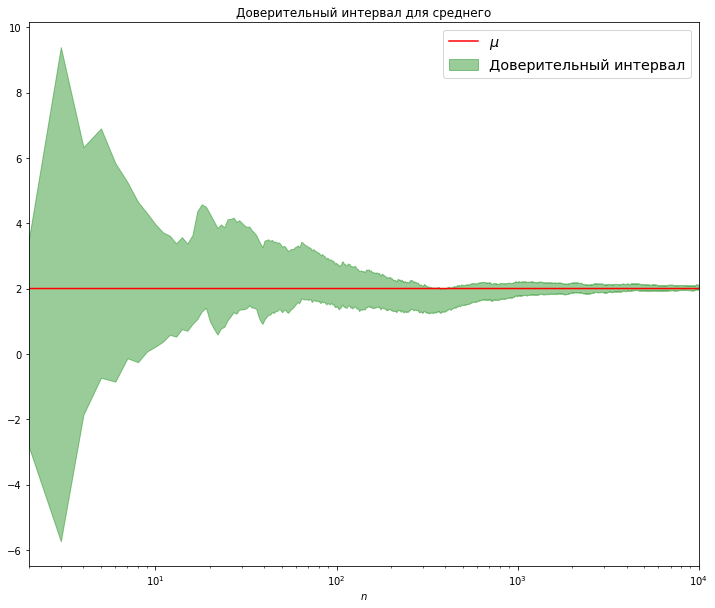

In [571]:
from scipy.stats import t
size = 10000
n = np.arange(1, size+1)
mu = 2
sigma = 3
alpha = 0.05

x = sigma*np.random.randn(size) + mu
X = np.cumsum(x) / n
S = np.cumsum(x**2)/n - X**2
X = X[1:]
S = S[1:]
n = n[1:]
interval = X + np.sqrt(S/n)*t.interval(1-alpha/2, df=np.arange(1, size))
fig = plt.figure(figsize=(12, 10))
axes = fig.add_subplot (1, 1, 1)
axes.set_xscale ('log')
plt.plot(np.ones(size-1)*mu, 'r', label=r'$\mu$')
plt.fill_between(n, interval[0], interval[1], color='g', edgecolor='g', alpha=0.4, label='Доверительный интервал')
plt.xlabel(r'$n$')
plt.xlim(n[0], n[-1])
plt.legend(fontsize = 'x-large')
plt.title('Доверительный интервал для среднего')
plt.show()

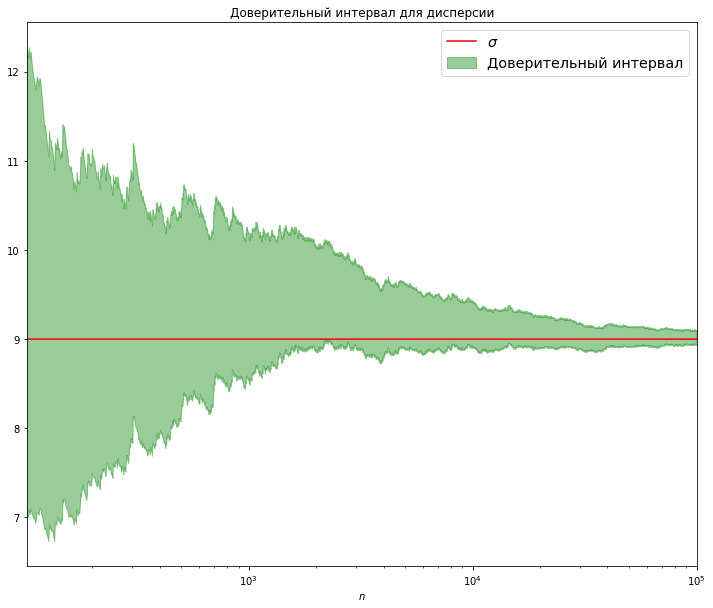

In [637]:
size = 100000
n = np.arange(1, size+1)
mu = 2
sigma = 3
alpha = 0.95

x = sigma*np.random.randn(size) + mu
X = np.cumsum(x) / n
S = np.cumsum(x**2)/n - X**2
X = X[1:]
S = S[1:]
n = n[1:]
interval1 = S*np.arange(1, size) / chi2.ppf(1 - (1+alpha)/2, df = np.arange(1, size))
interval2 = S*np.arange(1, size) / chi2.ppf(1 - (1-alpha)/2, df = np.arange(1, size))
fig = plt.figure(figsize=(12, 10))
axes = fig.add_subplot (1, 1, 1)
axes.set_xscale ('log')
plt.plot((np.ones(size-1)*sigma**2)[100:], 'r', label=r'$\sigma$')
plt.fill_between(n[100:], interval1[100:], interval2[100:], color='g',
                 edgecolor='g', alpha=0.4, label='Доверительный интервал')
plt.xlabel(r'$n$')
plt.xlim(n[100], n[-1])
plt.legend(fontsize = 'x-large')
plt.title('Доверительный интервал для дисперсии')
plt.show()

### 5.3 Поведение частичных сумм распределения Коши

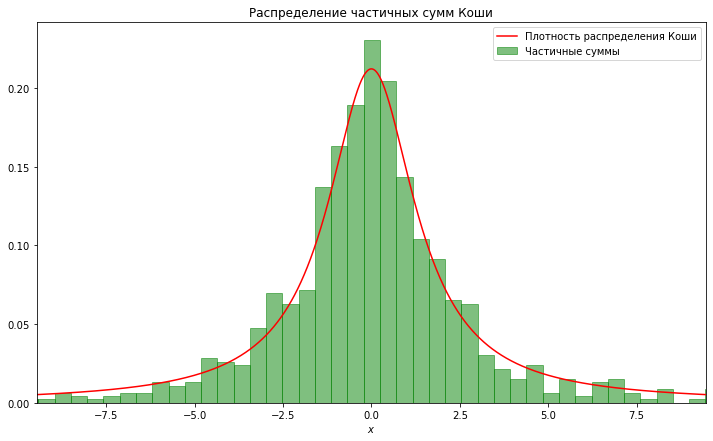

In [698]:
a = 0
b = 1.5
n = 100
size = 1000

plt.figure(figsize=(12, 7))

my_generator = cauchy(a, b, n, size)
S_n = np.sum(my_generator, axis=0)/n
# нужно задавать большое значение для параметра bins
plt.hist(S_n, density=True, alpha = 0.5, edgecolor='g', color='g', label='Частичные суммы', bins=3000)

alpha = 0.05
f_inv = lambda x: a + b*np.tan(np.pi * (x - 0.5))
x = np.arange(f_inv(alpha), f_inv(1 - alpha), 0.01)
test_generator = 1/np.pi * (b / ((x-a)**2 + b**2))
plt.plot(x, test_generator, 'r', label='Плотность распределения Коши')
plt.xlim(f_inv(alpha), f_inv(1 - alpha))
plt.xlabel(r'$x$')
plt.legend()
plt.title('Распределение частичных сумм Коши')
plt.show()

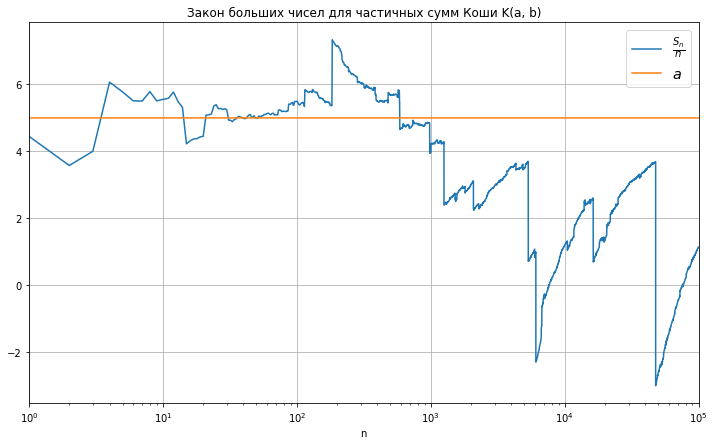

In [701]:
size = 100000
n = range(1, size+1)
a = 5
b = 1
mu = 2
sigma = 3

val = cauchy(a, b, size)

fig = plt.figure(figsize=(12, 7))
plt.semilogx(n, np.cumsum(val)/n, label = r'$\frac{S_n}{n}$')
plt.semilogx(n, np.ones(size)*a, label = r'$a$')
plt.xlim(1, size)
plt.grid()
plt.legend(fontsize = 'x-large')
plt.xlabel('n')
plt.title('Закон больших чисел для частичных сумм Коши K(a, b)')
plt.show()

## Задание 6.

### 6.1 Метод Монте-Карло

Пусть с.в. $X$ имеет плотность распределения $\rho(x)$. Тогда:
$$
\int\limits_{\mathbb{R}^n}f(x) dx = \int\limits_{\mathbb{R}^n}\dfrac{f(x)}{\rho(x)}\rho(x) dx = \int\limits_{\mathbb{R}^n} \tilde f(x) \rho(x) dx = \mathbb{E}\tilde f(X) \approx \dfrac{\sum\limits_{i=1}^{n}\tilde f(x^i)}{n}.
$$

Пусть $X \sim N(O, I), O, I \in \mathbb{R}^{10}$, тогда:
$$
\rho(x) = \frac{1}{(2\pi)^5}e^{-\frac{x_1^2 + \dots + x_{10}^2}{2}}.
$$
Кроме того: 
$$
\tilde f(x) = \frac{f(x)}{\rho(x)} = (2\pi)^5\dfrac{e^{-\left(\frac{1}{2^7 \cdot x_1^2 \cdot \dots \cdot x_{10}^2} + \frac{x_1^2 + \dots + x_{10}^2}{2}\right)}}{x_1^2\cdot \dots \cdot x_{10}^2}
$$

In [6]:
n = 10**6
с = 2**7

x = np.random.randn(n, 10)
mul = np.prod(x, axis = 1)**2
f = (2*np.pi)**5 * np.exp(-1/(с * mul) - np.sum(x**2, axis = 1)/2) / mul
res = np.sum(f) / n

In [7]:
res

123.56433210901072

#### Точность вычислений:
(не забудь добавить вывод через ЦПТ)  
$$
\mathbb{P}\left(\left|\frac{S_n}{n} - \mathbb{I}\right| < \varepsilon\right) = 2F\left(\frac{\varepsilon\sqrt{n}}{\sigma}\right) - 1,
$$
где $F(x) = \dfrac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^{x}e^{-\frac{u^2}{2}}du = \alpha.$  
Тогда:
$$
\varepsilon = \frac{K_\alpha \sigma}{\sqrt{n}},
$$
где $\sigma^2 \approx \sigma_n^2 = \frac{1}{n}\sum\limits_{i=1}^{n}f^2(x_i) - \left(\frac{1}{n}\sum\limits_{i=1}^{n}f(x_i)\right)^2.$

In [21]:
import time

n = [10**4, 10**5, 10**6, 10**7, 10**8]
alpha = 0.97
с = 2**7
res = pd.DataFrame(columns=['Число испытаний', 'Время работы процессора(c)',
                            'Погрешность', 'Результат'])

for n_cur in tqdm(n):
    start = time.process_time()
    x = np.random.randn(n_cur, 10)
    mul = np.prod(x, axis=1)**2
    f = (2*np.pi)**5 * np.exp(-1/(с*mul) - np.sum(x**2, axis=1)/2)/mul 
    ans = np.sum(f)/n_cur
    sigma = np.sum(f**2)/n_cur - ans**2
    eps = stats.norm.ppf(alpha)*np.sqrt(sigma/n_cur)
    res.loc[len(res)] = [n_cur, time.process_time()-start, eps, ans]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:21<00:00, 40.37s/it]


In [22]:
res

,Число испытаний,Время работы процессора(c),Погрешность,Результат
0,10000.0,0.109375,11.412638,128.196599
1,100000.0,0.046875,3.590046,122.308228
2,1000000.0,0.437500,1.143693,124.793092
3,10000000.0,3.984375,0.360412,124.483013
4,100000000.0,83.687500,0.113965,124.657149


In [36]:
n1 = 10**5
n = 10**4 * 10**5
ans = 0
sigma = 0
start = time.process_time()
for i in tqdm(range(10**4)):
    x = np.random.randn(n1, 10)
    mul = np.prod(x, axis=1)**2
    f = (2*np.pi)**5 * np.exp(-1/(с*mul) - np.sum(x**2, axis=1)/2)/mul 
    ans += np.sum(f)
    sigma += np.sum(f**2)
ans = ans/n
sigma = sigma/n - ans**2
eps = stats.norm.ppf(alpha)*np.sqrt(sigma/n)
res = [n, time.process_time()-start, eps, ans]

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [07:41<00:00, 21.65it/s]


In [37]:
res

[1000000000, 456.4375, 0.03609291708155474, 124.81711750600121]

### 6.2 Метод квадратур

После замены переменных: $x_i = tg\left(\dfrac{\pi}{2}t_i\right), \,t_i\in[0, 1]$ получим:
$$
\mathbb{I} = \left(\frac{\pi}{2}\right)^{10}\int\limits_0^1\dots\int\limits_0^1\frac{exp\left\{-\left[\sum\limits_{i=1}^{10}tg\left(\dfrac{\pi}{2}t_i\right)^2 + \frac{1}{2^7 \prod\limits_{i=1}^{10}tg\left(\dfrac{\pi}{2}t_i\right)^2}\right]\right\}}{\prod\limits_{i=1}^{10}tg\left(\dfrac{\pi}{2}t_i\right)^2 \cdot \prod\limits_{i=1}^{10}cos\left(\dfrac{\pi}{2}t_i\right)^2}dt_1\,dt_2\,\dots\,dt_{10}.
$$

Метод прямоугольников:
$$
I_n = \frac{1}{N^{10}}\sum\limits_{i_1=1}^{N}\dots\sum\limits_{i_{10}=1}^N f\left(\frac{i_1}{N},\dots,\frac{i_{10}}{N}\right)
$$

In [82]:
N_list = [3, 4, 5, 6]
f = lambda x: c*np.exp(-np.sum(np.tan(np.pi/2 * np.array(x))**2) -\
                       1/(c1 * np.prod(np.tan(np.pi/2 * np.array(x))**2)))/(np.prod(np.sin(np.pi/2 * np.array(x))**2))
c = (np.pi/2)**10
c1 = 2**7
res = pd.DataFrame(columns=['N', 'Время работы процессора(c)', 'Результат'])
for N in tqdm(N_list):
    i = np.arange(1, N+1)/N
    start = time.process_time()
    ans = np.nansum(list(map(f, itertools.product(i, repeat=10)))) / N**10
    res.loc[len(res)] = [N, time.process_time()-start, ans]

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [42:43<00:00, 640.94s/it]


In [83]:
res

,N,Время работы процессора(c),Результат
0,3.0,2.062500,0.053938
1,4.0,32.015625,0.086482
2,5.0,342.468750,0.130859
3,6.0,2176.734375,0.125344
